# Gradient decent

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython import display

## 1. Declare function
- Cost funtion: $J(x)=0.15x^2+{\pi sin(x)\over3}$
- Gradient: $J'(x)=0.3x+{\pi cos(x)\over3}$
- At *i-th* step: $x[i+1]=x[i]-\alpha*0.3x+{\pi cos(x)\over3}$

In [3]:
def cost(x: float) -> float:
    return 0.15 * x**2 + math.pi*math.sin(x)/3

In [4]:
def grad_normal(x: float) -> float:
    return 0.3 * x + (math.pi * math.cos(x))/3

def grad(x: float) -> float:
    return grad_normal(x)

In [5]:
def plot(x: np.ndarray, y: np.ndarray, x0: float, y0: float, x1: float, y1: float) -> None:
    plt.plot(x, y, 'b-', x0, y0, 'ro', x1, y1, 'yo', [x0, x1], [y0, y1], 'g-')
    return

### 1. Normal Gradient Descent

In [6]:
def grad_desc_normal(eta, x0):
    x = [x0]
    it = 0
    y = [cost(x0)]
    x_ = np.arange(-6, 6, 0.01)
    y_ = np.asarray([cost(i) for i in x_], dtype=float)
    plt.ion()
    for it in range(100):
        x_new= x[-1] - eta*grad(x[-1])
        x.append(x_new)
        y.append(cost(x_new))
        if abs(grad(x_new)) < .001:#1e-3:
            break

    for i in range(1, len(x)):
        plt.clf()
        plot(x_, y_, x[i-1], y[i-1], x[i], y[i])
        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(0.1)
        pass
    return x, it

### 2. Momentium Gradient Descent

In [12]:
def grad_desc_momentium(eta, x0):
    stop_threadhold = 0.01
    gamma = 0.9 #0.9
    x = [x0]
    it = 0
    y = [cost(x0)]
    x_ = np.arange(-6, 6, 0.01)
    y_ = np.asarray([cost(i) for i in x_], dtype=float)
    plt.ion()
    for it in range(100):
        x_new= gamma * x[-1] - eta*grad(x[-1])
        x.append(x_new)
        y.append(cost(x_new))
        if len(x) > 1 and abs(grad(x[-1])-grad(x[-2])) < stop_threadhold: #1e-3:
            break

    for i in range(1, len(x)):
        plt.clf()
        plot(x_, y_, x[i-1], y[i-1], x[i], y[i])
        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(0.1)
        pass
    return x, it

## 2.Test

### 1. Normal

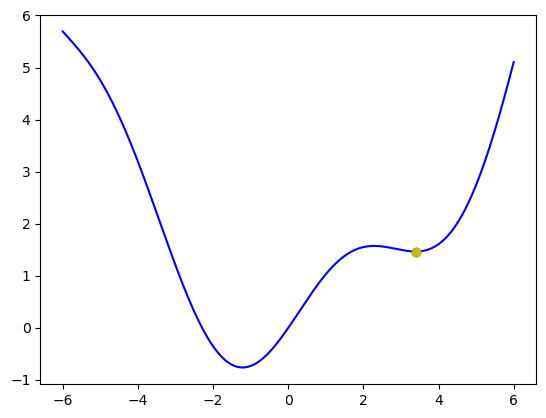

Normal x1 = -1.215993, cost = -0.760177, obtained after 67 iterations
Normal x2 = 3.388707, cost = 1.466348, obtained after 99 iterations


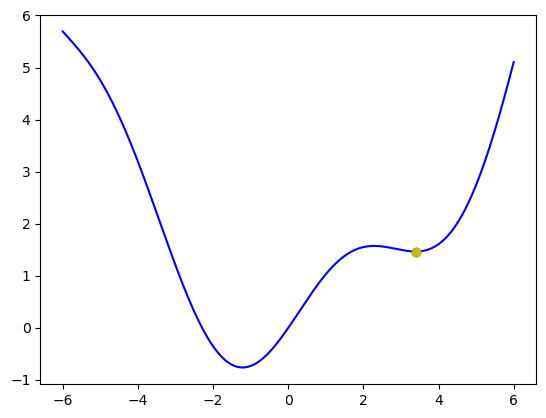

In [15]:
eta = .1
x0=-5
(x1, it1) = grad_desc_normal(eta=eta, x0=x0)
# plt.show()
x0=5
(x2, it2) = grad_desc_normal(eta=eta, x0=x0)
# plt.show()
print('Normal x1 = %f, cost = %f, obtained after %d iterations'%(x1[-1], cost(x1[-1]), it1))
print('Normal x2 = %f, cost = %f, obtained after %d iterations'%(x2[-1], cost(x2[-1]), it2))

### 2. Momentium

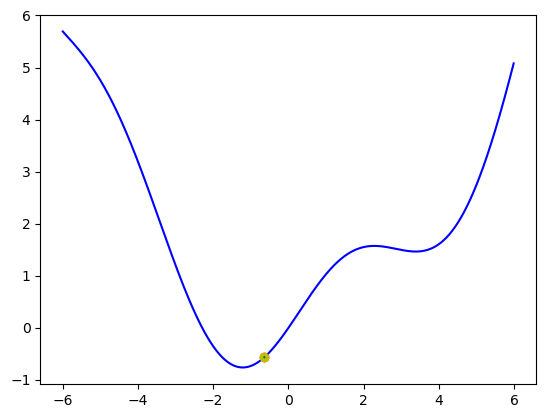

Momentium x1 = -0.647834, cost = -0.568989, obtained after 31 iterations
Momentium x2 = -0.640060, cost = -0.563981, obtained after 43 iterations


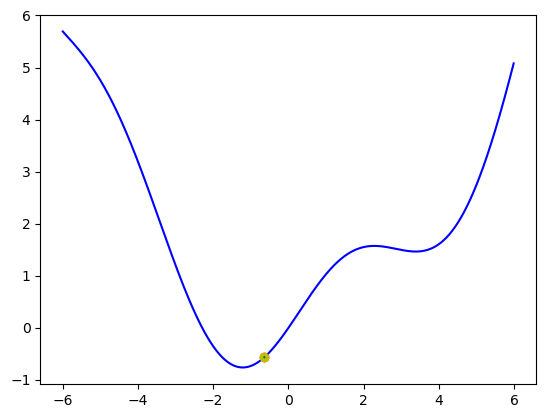

In [14]:
eta =.1
x0=-5
(x1, it1) = grad_desc_momentium(eta=eta, x0=x0)
# plt.show()
x0=5
(x2, it2) = grad_desc_momentium(eta=eta, x0=x0)
# plt.show()
print('Momentium x1 = %f, cost = %f, obtained after %d iterations'%(x1[-1], cost(x1[-1]), it1))
print('Momentium x2 = %f, cost = %f, obtained after %d iterations'%(x2[-1], cost(x2[-1]), it2))